<a href="https://colab.research.google.com/github/eminshall/QuantFinanceWorkbooks/blob/main/Momentum_Strategy_Basic_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
#Get the stock data
raw = yf.download('^XAU', start="2018-01-01", end="2023-02-28")['Adj Close']
data = pd.DataFrame(raw)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.tail()

,Adj Close
Date,
2023-02-21,116.360001
2023-02-22,114.139999
2023-02-23,112.870003
2023-02-24,111.839996
2023-02-27,112.750000


In [6]:
data['returns'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

<Axes: xlabel='Date'>

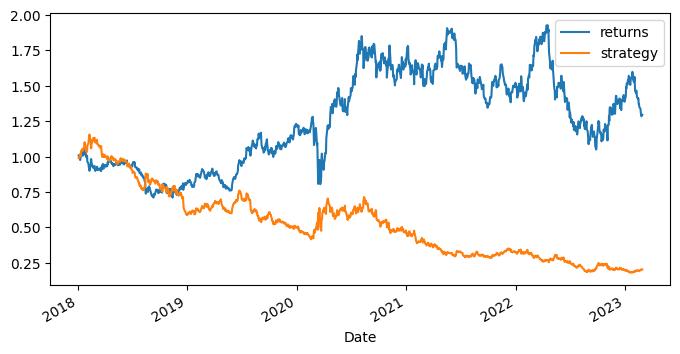

In [8]:
# If the last return was positive --> buy, if the last return was negative --> sell
data['position'] = np.sign(data['returns'])
data['strategy'] = data['position'].shift(1) * data['returns']

data[['returns', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(8,4))

<Axes: xlabel='Date'>

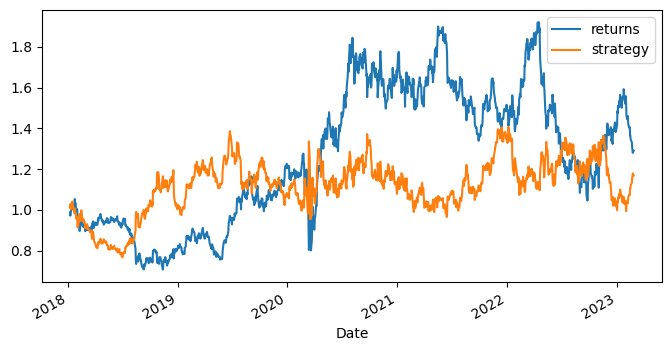

In [10]:
#If the average last 3 returns is positive --> buy and vice versa
data['position'] = np.sign(data['returns'].rolling(3).mean())

data['strategy'] = data['position'].shift(1) * data['returns']

data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(8,4))

## Intraday Examples

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

with open('/content/drive/MyDrive/key.txt', 'r') as f:
    key = f.readline()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [73]:
raw = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=TSLA&interval=1min&outputsize=compact&apikey={key}&datatype=csv'

In [74]:
df = pd.read_csv(raw)
df = pd.DataFrame(df)

df.head()

,timestamp,open,high,low,close,volume
0,2023-04-10 20:00:00,184.33,184.46,184.33,184.40,10745
1,2023-04-10 19:59:00,184.33,184.37,184.30,184.34,7509
2,2023-04-10 19:58:00,184.30,184.35,184.28,184.35,9090
3,2023-04-10 19:57:00,184.28,184.31,184.26,184.30,12856
4,2023-04-10 19:56:00,184.28,184.30,184.27,184.27,5612


In [75]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df.sort_values('timestamp', ascending=True, inplace=True)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2023-04-10 18:19:00,184.3200,184.3200,184.3200,184.3200,971
2023-04-10 18:20:00,184.3474,184.3500,184.3200,184.3200,2076
2023-04-10 18:21:00,184.3400,184.3400,184.3400,184.3400,965
2023-04-10 18:22:00,184.3500,184.3700,184.3301,184.3301,2167
2023-04-10 18:23:00,184.3475,184.3475,184.3200,184.3200,1066


In [76]:
df['returns'] = np.log(df['close'] / df['close'].shift(1))

to_plot = ['returns']

In [77]:
# Rolling Momentum of five different averages
for m in [1, 3, 5, 7, 9]:
  df['position_%d' % m] = np.sign(df['returns'].rolling(m).mean())
  df['strategy_%d' % m] = (df['position_%d' % m].shift(1) * df['returns'])
  to_plot.append('strategy_%d' % m)

<Axes: title={'center': 'TSLA intraday'}, xlabel='timestamp'>

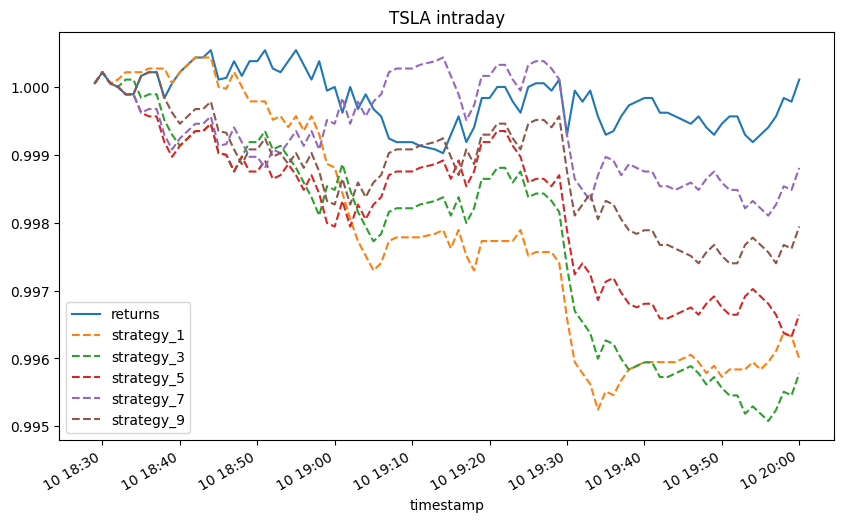

In [78]:
df[to_plot].dropna().cumsum().apply(np.exp).plot(
    title='TSLA intraday',
    figsize=(10,6), style=['-','--','--','--','--','--']
)